In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from math import e
connection = sqlite3.connect('file:database.db?mode=ro', uri=True)

# market_orders = pd.read_sql_query("SELECT * FROM market_orders", connection)
market_history = pd.read_sql_query("SELECT * FROM market_history", connection)

market_history = market_history.sort_values(by=['date'])

connection.close()

In [3]:
item_34 = market_history.loc[market_history['item_id'] == 23111]
item_34 = item_34.loc[item_34['region_id'] == 10000002]

item_34

,id,date,item_id,region_id,low_price,high_price,average_price,order_count,volume
2630891,2630892,2022-09-01,23111,10000002,478700.0,650500.0,588082.09,16,67
2630892,2630893,2022-09-02,23111,10000002,650400.0,650400.0,650400.00,17,112
2630893,2630894,2022-09-03,23111,10000002,602500.0,650400.0,642876.62,14,77
2630894,2630895,2022-09-04,23111,10000002,650500.0,650500.0,650500.00,21,178
2630895,2630896,2022-09-05,23111,10000002,650500.0,700000.0,650700.00,28,352
...,...,...,...,...,...,...,...,...,...
2631282,2631283,2023-09-29,23111,10000002,878300.0,878300.0,878300.00,25,123
2631283,2631284,2023-09-30,23111,10000002,878400.0,878400.0,878400.00,29,173
2631284,2631285,2023-10-01,23111,10000002,710700.0,898100.0,879900.00,63,580
2631285,2631286,2023-10-02,23111,10000002,969100.0,969100.0,969100.00,16,101


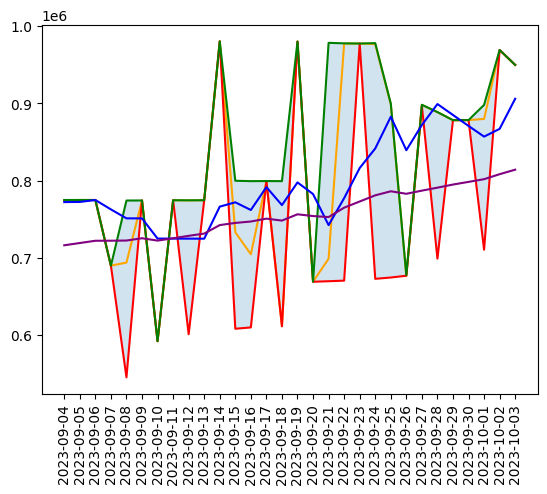

In [4]:
last_30_days = item_34.tail(30)
rolling_7 = item_34['average_price'].rolling(7).mean().tail(30)
rolling_30 = item_34['average_price'].rolling(30).mean().tail(30)

plt.figure()
plt.plot(last_30_days['date'], last_30_days['average_price'], label='average_price', color='orange')
plt.plot(last_30_days['date'], last_30_days['low_price'], label='average_price', color='red')
plt.plot(last_30_days['date'], last_30_days['high_price'], label='average_price', color='green')
plt.plot(last_30_days['date'], rolling_7, label='average_price', color='blue')
plt.plot(last_30_days['date'], rolling_30, label='average_price', color='purple')

plt.fill_between(last_30_days['date'], last_30_days['low_price'], last_30_days['high_price'], alpha=0.2)
plt.xticks(rotation=90)
plt.show()


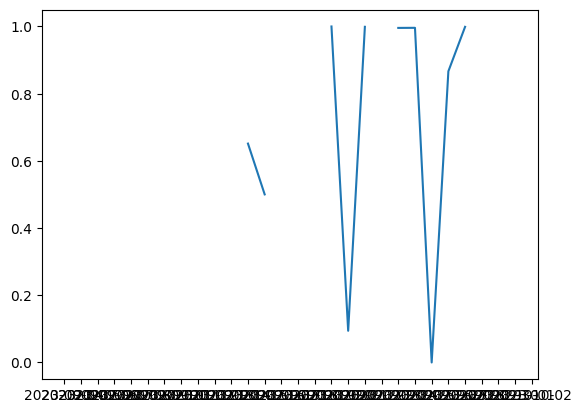

In [5]:
last_30_days = item_34.tail(30)
difference = last_30_days['high_price'] - last_30_days['low_price']
relative_to_low = last_30_days['average_price'] - last_30_days['low_price']
relative = relative_to_low / difference
plt.figure()

# plt.plot(last_30_days['date'], difference, label='average_price')
plt.plot(last_30_days['date'], relative, label='average_price')

plt.show()

In [7]:
item_34['margin'] = ((item_34['high_price'] - item_34['low_price']) / item_34['low_price']) * 100
item_34['expected_history_profit'] = (item_34['high_price'] * 0.91) - (item_34['low_price'] * 1.09)
item_34

,id,date,item_id,region_id,low_price,high_price,average_price,order_count,volume,margin,expected_history_profit
2630891,2630892,2022-09-01,23111,10000002,478700.0,650500.0,588082.09,16,67,35.888866,70172.0
2630892,2630893,2022-09-02,23111,10000002,650400.0,650400.0,650400.00,17,112,0.000000,-117072.0
2630893,2630894,2022-09-03,23111,10000002,602500.0,650400.0,642876.62,14,77,7.950207,-64861.0
2630894,2630895,2022-09-04,23111,10000002,650500.0,650500.0,650500.00,21,178,0.000000,-117090.0
2630895,2630896,2022-09-05,23111,10000002,650500.0,700000.0,650700.00,28,352,7.609531,-72045.0
...,...,...,...,...,...,...,...,...,...,...,...
2631282,2631283,2023-09-29,23111,10000002,878300.0,878300.0,878300.00,25,123,0.000000,-158094.0
2631283,2631284,2023-09-30,23111,10000002,878400.0,878400.0,878400.00,29,173,0.000000,-158112.0
2631284,2631285,2023-10-01,23111,10000002,710700.0,898100.0,879900.00,63,580,26.368369,42608.0
2631285,2631286,2023-10-02,23111,10000002,969100.0,969100.0,969100.00,16,101,0.000000,-174438.0


## Calculating expected profit value per item

We need to now the open buy and sell prices of the day, via market orders we can calculate the average buy/sell prices of the day.
I think we might also need data of the 7d rolling buy/sell prices.

With this data we can calculate the following useful data points:
- 1d/7d margin
- 1d/7d spread

We use worst case scenario of taxes. 8% taxes on buy and sell prices.
We also have a _variable_ $n$ to describe our buy order frequence which we will use for taxes

$$profit = 1d/7d (sell - 9\%) - (buy + 9\% + (n*1\%))$$

This profit describes the average profit per item.

## Percentage of market capture

From the previous part we have update frequence $n$, which we assume is spread throughout the day.

Now we need to calculate how much of the market we can capture. We have:
- User Update Frequency
- Competition order update frequency.
- Competition order update frequency over time

Based on competition we can calculate the percentage of market capture per day.
$$time_before_competing_order = (24h / competition_orders)$$
$$time_on_top = time_before_competing_order * n$$

## Items bought to Items sold

Items that are bought need to be sold.

We have:
- Volume of items traded
- Volume of buy/sell orders that disapeared
- buy/sell ratio

I guess we can take the lowest of the buy/sell volume averaged over a few days.